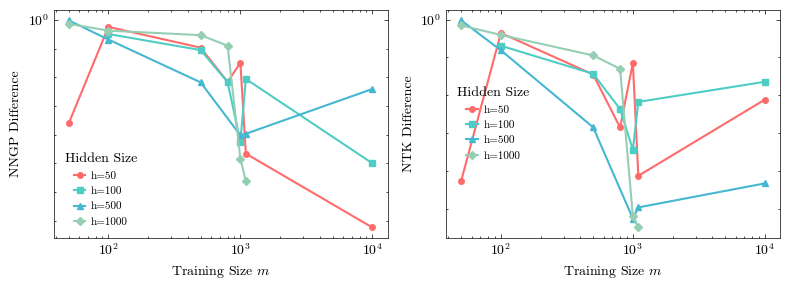

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import Dict, List, Optional, Tuple
import matplotlib as mpl
from pathlib import Path

@dataclass
class PlotStyle:
    color: str
    linestyle: str
    linewidth: float
    marker: Optional[str] = None
    markersize: Optional[float] = None
    alpha: float = 1.0
    label: Optional[str] = None

class MetricPlotter:
    def __init__(self):
        self.setup_science_style()
        
    @staticmethod
    def setup_science_style():
        """Set up consistent science styling with proper log-scale ticks."""
        plt.style.use('default')
        mpl.rcParams.update({
            'figure.figsize': (3.3, 2.5),
            'figure.dpi': 100,
            'font.family': 'serif',
            'font.serif': ['cmr10', 'Computer Modern Serif', 'DejaVu Serif'],
            'text.usetex': False,
            'axes.formatter.use_mathtext': True,
            'mathtext.fontset': 'cm',
            'axes.linewidth': 0.5,
            'axes.spines.top': True,
            'axes.spines.right': True,
            'axes.spines.left': True,
            'axes.spines.bottom': True,
            'xtick.direction': 'in',
            'ytick.direction': 'in',
            'xtick.major.width': 0.5,
            'ytick.major.width': 0.5,
            'xtick.minor.width': 0.5,
            'ytick.minor.width': 0.5,
            'xtick.major.size': 3,
            'ytick.major.size': 3,
            'xtick.minor.size': 1.5,
            'ytick.minor.size': 1.5,
            'xtick.top': True,
            'ytick.right': True,
            'grid.linewidth': 0.5,
            'lines.linewidth': 1.0,
            'lines.markersize': 3,
            'legend.frameon': False,
            'legend.borderpad': 0,
            'legend.borderaxespad': 1.0,
            'legend.handlelength': 1.0,
            'legend.handletextpad': 0.5,
        })

    def configure_log_axes(self, ax, x_only=False):
        """Configure axes for proper log scale appearance."""
        ax.set_xscale('log')
        #if not x_only:
            #ax.set_yscale('log')
        ax.minorticks_on()
        
        for axis in [ax.xaxis, ax.yaxis]:
            axis.set_major_formatter(mpl.ticker.LogFormatterSciNotation())
            axis.set_major_locator(mpl.ticker.LogLocator(numticks=15))
            axis.set_minor_locator(mpl.ticker.LogLocator(subs=np.arange(2, 10), numticks=15))
            axis.set_tick_params(which='both', direction='in')

def plot_metrics(data_dir, hidden_sizes, style_config, output_path="metric_plots.png"):
    plotter = MetricPlotter()
    
    # Create figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
    
    for hidden_size in hidden_sizes:
        # Load and plot NNGP data
        nngp_file = f"nngp_mup_hidden_size{hidden_size}_n_train_vs_nngp_diff.npy"
        nngp_path = Path(data_dir) / nngp_file
        
        # Load NTK data
        ntk_file = f"ntk_mup_hidden_size{hidden_size}_n_train_vs_ntk_diff.npy"
        ntk_path = Path(data_dir) / ntk_file
        
        # Get style for this hidden size
        style = style_config.get(hidden_size, PlotStyle(
            color='black',
            linestyle='-',
            linewidth=1.0,
            marker='o',
            markersize=4,
            label=f'h={hidden_size}'
        ))
        
        # Plot NNGP data if file exists
        if nngp_path.exists():
            nngp_data = np.load(nngp_path)
            x_nngp = nngp_data[:, 0]  # First column is training size
            y_nngp = nngp_data[:, 1]  # Second column is the metric
            
            # Sort by x values to ensure proper line plotting
            sort_idx = np.argsort(x_nngp)
            x_nngp = x_nngp[sort_idx]
            y_nngp = y_nngp[sort_idx]
            
            ax1.plot(x_nngp, y_nngp,
                    color=style.color,
                    linestyle=style.linestyle,
                    linewidth=style.linewidth,
                    marker=style.marker,
                    markersize=style.markersize,
                    label=style.label)
        
        # Plot NTK data if file exists
        if ntk_path.exists():
            ntk_data = np.load(ntk_path)
            x_ntk = ntk_data[:, 0]  # First column is training size
            y_ntk = ntk_data[:, 1]  # Second column is the metric
            
            # Sort by x values to ensure proper line plotting
            sort_idx = np.argsort(x_ntk)
            x_ntk = x_ntk[sort_idx]
            y_ntk = y_ntk[sort_idx]
            
            ax2.plot(x_ntk, y_ntk,
                    color=style.color,
                    linestyle=style.linestyle,
                    linewidth=style.linewidth,
                    marker=style.marker,
                    markersize=style.markersize,
                    label=style.label)
    
    # Configure axes
    plotter.configure_log_axes(ax1)
    plotter.configure_log_axes(ax2)
    
    # Set labels and titles
    ax1.set_xlabel(r'Training Size $m$')
    ax1.set_ylabel(r'NNGP Difference')
    ax2.set_xlabel(r'Training Size $m$')
    ax2.set_ylabel(r'NTK Difference')
    
    # Add legends
    ax1.legend(title='Hidden Size', frameon=False, fontsize=8)
    ax2.legend(title='Hidden Size', frameon=False, fontsize=8)
    
    plt.tight_layout()
    fig.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
    plt.show()  # Display the plot
    plt.close()

def main():
    # Define the data directory
    data_dir = "/mnt/users/goringn/NNs_vs_Kernels/stair_function/metric_data"
    
    # Define hidden sizes to plot
    hidden_sizes = [50, 100, 500,1000]
    
    # Define styles for each hidden size
    style_config = {
        50: PlotStyle(
            color='#FF6B6B',  # Coral red
            linestyle='-',
            linewidth=1.5,
            marker='o',
            markersize=4,
            label='h=50'
        ),
        100: PlotStyle(
            color='#4ECDC4',  # Turquoise
            linestyle='-',
            linewidth=1.5,
            marker='s',
            markersize=4,
            label='h=100'
        ),
        500: PlotStyle(
            color='#45B7D1',  # Blue
            linestyle='-',
            linewidth=1.5,
            marker='^',
            markersize=4,
            label='h=500'
        ),
        1000: PlotStyle(
            color='#96CEB4',  # Green
            linestyle='-',
            linewidth=1.5,
            marker='D',
            markersize=4,
            label='h=1000'
        )
    }
    
    # Create the plots
    plot_metrics(data_dir, hidden_sizes, style_config)

if __name__ == "__main__":
    main()

In [3]:
import numpy as np
from pathlib import Path

def check_dimensions():
    # Define the data directory
    data_dir = "/mnt/users/goringn/NNs_vs_Kernels/stair_function/metric_data"
    
    # Get all .npy files
    npy_files = sorted(Path(data_dir).glob("*.npy"))
    
    # Print dimensions for each file
    for file_path in npy_files:
        try:
            data = np.load(file_path)
            print(f"\nFile: {file_path.name}")
            print(f"Shape: {data.shape}")
            print(f"Data type: {data.dtype}")
            # Print first element to understand structure
            print(f"First element type: {type(data[0])}")
            if data.size > 0:
                print(f"Sample value: {data[0]}")
        except Exception as e:
            print(f"Error loading {file_path.name}: {str(e)}")

if __name__ == "__main__":
    check_dimensions()


File: nngp_mup_hidden_size1000_n_train_vs_nngp_diff.npy
Shape: (6, 2)
Data type: float64
First element type: <class 'numpy.ndarray'>
Sample value: [500.           0.94661731]

File: nngp_mup_hidden_size100_n_train_vs_nngp_diff.npy
Shape: (6, 2)
Data type: float64
First element type: <class 'numpy.ndarray'>
Sample value: [1.10000000e+03 7.94133902e-01]

File: nngp_mup_hidden_size500_n_train_vs_nngp_diff.npy
Shape: (6, 2)
Data type: float64
First element type: <class 'numpy.ndarray'>
Sample value: [1.10000000e+03 6.03168666e-01]

File: nngp_mup_hidden_size50_n_train_vs_nngp_diff.npy
Shape: (7, 2)
Data type: float64
First element type: <class 'numpy.ndarray'>
Sample value: [50.          0.63914198]

File: nngp_mup_n_train10000_hidden_size_vs_nngp_diff.npy
Shape: (3, 2)
Data type: float64
First element type: <class 'numpy.ndarray'>
Sample value: [50.          0.27686021]

File: nngp_mup_n_train1000_hidden_size_vs_nngp_diff.npy
Shape: (4, 2)
Data type: float64
First element type: <class 'n